In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv('data.csv')

In [114]:
data

,x,y
0,54,1
1,56,2
2,102,11
3,3,2
4,24,33
...,...,...
95,9,92
96,48,84
97,64,24
98,32,32


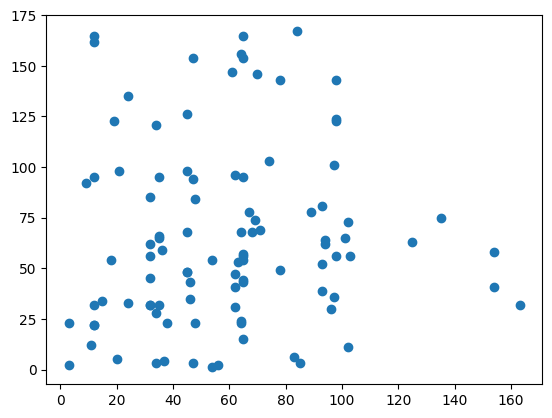

In [115]:
plt.scatter(data['x'],data['y'])

## Create similarity matrix

In [116]:
from sklearn.metrics.pairwise import cosine_similarity

In [117]:
data_matrix = data.to_numpy()
# Calculate cosine similarity
similarity_cos_matrix = cosine_similarity(data_matrix)

In [118]:
print(similarity_cos_matrix)
print(similarity_cos_matrix.shape)

[[1.         0.99985238 0.99604997 ... 0.94266984 0.72007789 0.68925746]
 [0.99985238 1.         0.99742859 ... 0.94826473 0.73189397 0.70160425]
 [0.99604997 0.99742859 1.         ... 0.96857935 0.77884743 0.75086792]
 ...
 [0.94266984 0.94826473 0.96857935 ... 1.         0.91036648 0.89153278]
 [0.72007789 0.73189397 0.77884743 ... 0.91036648 1.         0.99905616]
 [0.68925746 0.70160425 0.75086792 ... 0.89153278 0.99905616 1.        ]]
(100, 100)


In [119]:
from sklearn.metrics.pairwise import euclidean_distances

In [120]:
similarity_euclidean_matrix = euclidean_distances(data_matrix)

In [121]:
print(similarity_euclidean_matrix)
print(similarity_cos_matrix.shape)

[[ 0.          2.23606798 49.03060269 ... 25.07987241 38.01315562
  44.38468204]
 [ 2.23606798  0.         46.87216658 ... 23.40939982 38.41874542
  46.09772229]
 [49.03060269 46.87216658  0.         ... 40.16217126 73.08214556
  91.00549434]
 ...
 [25.07987241 23.40939982 40.16217126 ...  0.         32.984845
  54.34151268]
 [38.01315562 38.41874542 73.08214556 ... 32.984845    0.
  29.        ]
 [44.38468204 46.09772229 91.00549434 ... 54.34151268 29.
   0.        ]]
(100, 100)


## Kmeans algorithm

In [122]:
def getRandomCentroids(numFeatures, k):
    # Generate random centroids within the range of the features
    centroids = np.random.rand(k, numFeatures)
    return centroids


In [123]:
def shouldStop(oldCentroids, centroids, iterations, maxIterations=100):
    # Stop if the maximum number of iterations is reached
    if iterations > maxIterations:
        return True
    # Stop if centroids no longer change
    if oldCentroids is not None and np.array_equal(oldCentroids, centroids):
        return True
    return False

In [124]:
def getLabels(dataSet, centroids,cos=True):
    # Assign labels to each datapoint based on the nearest centroid using cosine similarity
    if cos:
      similarities = cosine_similarity(dataSet, centroids)
      labels = np.argmax(similarities, axis=1)
    else: 
      distances = euclidean_distances(dataSet, centroids)
      labels = np.argmin(distances, axis=1)
    return labels

In [125]:
def getCentroids(dataSet, labels, k):
    # Calculate new centroids based on the mean of the datapoints in each cluster
    centroids = np.zeros((k, dataSet.shape[1]))
    for i in range(k):
        clusterPoints = dataSet[labels == i]
        if len(clusterPoints) > 0:
            centroids[i] = np.mean(clusterPoints, axis=0)
    return centroids

In [126]:
def kmeans(dataSet, k, cos=True):
    # Initialize centroids randomly
    numFeatures = dataSet.shape[1]
    centroids = getRandomCentroids(numFeatures, k)
    
    # Initialize bookkeeping vars
    iterations = 0
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        iterations += 1
        
        # Save old centroids for convergence test
        oldCentroids = centroids
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids,cos)
        
        # Assign centroids based on datapoint labels
        centroids = getCentroids(dataSet, labels, k)
    
    return centroids


In [127]:
cosine_centroids = kmeans(data,4)
euclidean_centroids = kmeans(data,4,False)

In [128]:
euclidean_centroids

array([[108.05      ,  56.1       ],
       [ 48.96969697,  70.48484848],
       [ 38.93333333,  21.13333333],
       [ 57.29411765, 144.35294118]])

In [129]:
cosine_centroids

array([[ 35.46875   , 101.28125   ],
       [ 81.08333333,  45.16666667],
       [ 59.41935484,  66.29032258],
       [ 76.61538462,  12.        ]])

In [130]:
def plotClusters(dataSet, centroids,cos=True):
    # Assign labels to each datapoint based on the nearest centroid using cosine similarity

    labels = getLabels(dataSet,centroids,cos)

    color_map = plt.get_cmap('tab10')
    for i in range(len(dataSet)):
      color = color_map(labels[i])
      plt.scatter(dataSet['x'][i], dataSet['y'][i], c=color)

    # Plot the centroids with a different marker and color
    for i in range(len(centroids)):
       plt.scatter(centroids[i][0], centroids[i][1], marker='x', c=color_map(i+len(dataSet)), label=f'Centroid {i}')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    if cos:
      plt.title('K-Means Clustering using cosine similarity')
    else:
      plt.title('K-Means Clustering using Euclidean Distance')
    plt.legend()
    plt.show()


## Plot using Cosine Similarity

<ipython-input-130-c52b37c8288c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(dataSet['x'][i], dataSet['y'][i], c=color)
<ipython-input-130-c52b37c8288c>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroids[i][0], centroids[i][1], marker='x', c=color_map(i+len(dataSet)), label=f'Centroid {i}')


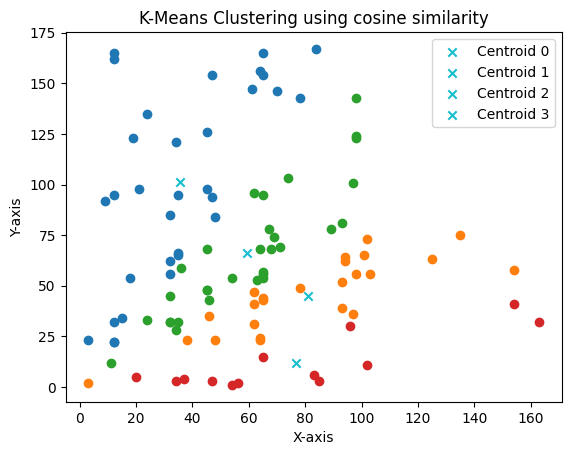

In [131]:
plotClusters(data,cosine_centroids)

## Plot using Euclidean Distance

<ipython-input-130-c52b37c8288c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(dataSet['x'][i], dataSet['y'][i], c=color)
<ipython-input-130-c52b37c8288c>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroids[i][0], centroids[i][1], marker='x', c=color_map(i+len(dataSet)), label=f'Centroid {i}')


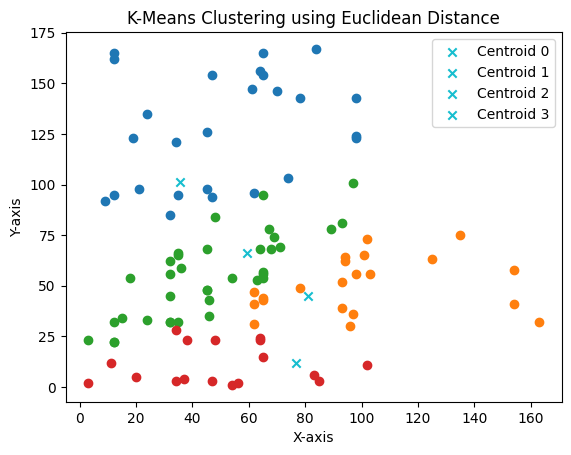

In [132]:
plotClusters(data,cosine_centroids,False)